<h1>Primer Clase</h1>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
tabla_1 = pd.read_csv("../input/wtageinf.csv")
tabla_1.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [3]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [4]:
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

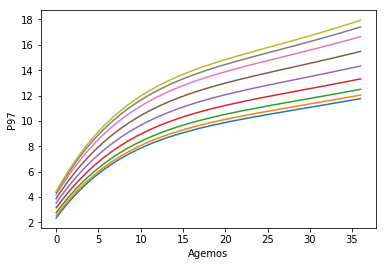

In [5]:
filtrado= tabla_1[tabla_1.Sex==1]
cols = ['P3', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P97']
for c in cols:
    sb.lineplot(x='Agemos', y=c, data=filtrado)

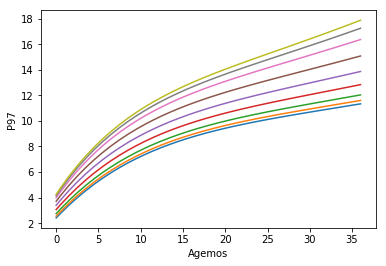

In [6]:
filtrado2= tabla_1[tabla_1.Sex==2]
cols = ['P3', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P97']
for c in cols:
    sb.lineplot(x='Agemos', y=c, data=filtrado2)

#### Ejercicio 2:

Graficar los pasos.

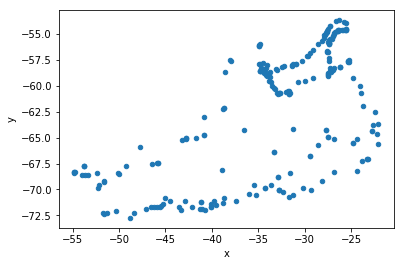

In [7]:
tabla_pasos = pd.read_json("../input/pasos.json")
#primero quitamos los valores duplicados
non_duplicated_data = tabla_pasos[tabla_pasos.name.duplicated(keep='first') == False]
split_pasos = pd.DataFrame(non_duplicated_data)
split_pasos[['x', 'y']] = pd.DataFrame(tabla_pasos.location.values.tolist(), index=tabla_pasos.index)

#para graficarlos usamos un scatter plot.
split_pasos.plot.scatter(x='x', y='y')

<h1>Limpieza</h1><h2>(Segunda Clase)</h2>

In [8]:
#Carga de datos
kickstarter_2018 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

#### Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [9]:
#Quitamos los registros con "nan" en la columna "name"
clean_data = kickstarter_2018.dropna(subset=['name'])
#clean_data[clean_data.duplicated(subset=['name'], keep='first')].sort_values("name").count()

#Chequeamos para ver si hay duplicados, viendo si el valor de unicos y total son diferentes
pd.Series(clean_data.name,dtype=str).describe()

count                       378657
unique                      375764
top       New EP/Music Development
freq                            41
Name: name, dtype: object

In [10]:
#Listamos solo los duplicados ordenados por nombre
clean_data[clean_data.name.astype('str').duplicated(keep=False)].sort_values("name")

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
265864,422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.0,2017-04-14 00:08:52,1.0,failed,1,US,25.00,1.00,100000.00
352573,866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.0,2015-01-27 19:30:43,7248.0,canceled,9,US,7248.00,7248.00,20000.00
149726,1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.0,2014-07-29 13:12:21,11260.0,canceled,7,US,11260.00,11260.00,15000.00
196363,1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.0,2016-05-07 01:56:36,0.0,canceled,0,"N,0""",NaN,0.00,5000.00
353421,870322805,"""Color"" Music Video",Music,Music,USD,2015-09-16,1100.0,2015-09-02 00:03:02,1100.0,undefined,0,"N,0""",NaN,1100.00,1100.00


#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [11]:
from hashlib import md5
#definicion de la funcion para hash
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

In [12]:
#filtramos solo los registros con nombres duplicados y los contamos
duplicated_names = clean_data[clean_data.name.astype('str').duplicated(keep=False)].sort_values("name").name
duplicated_names.count()

5121

In [13]:
#una vez hasheados los nombres volvemos a contar y vemos que da el mismo numero
duplicated_names.astype('str').apply(hashit).duplicated(keep=False).count()

5121

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1. tambien ejemplos de strings que veiamos bien y ahora mal

In [14]:
import ftfy.badness as bad

In [15]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [16]:
#Cantidad de nombres raros importando con encoding default
kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1].name.count()

26

In [17]:
#Cantidad de nombres raros importando con 'iso-8859-1'
kickstarter_2018_encoded = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
kickstarter_2018_encoded['name_weirdness'] = kickstarter_2018_encoded['name'].apply(weird)
kickstarter_2018_encoded[kickstarter_2018_encoded['name_weirdness'] > 1].name.count()

7682

In [18]:
#Ejemplos de nombres que antes veiamos bien y ahora no
kickstarter_2018['new_name'] = kickstarter_2018_encoded['name']
kickstarter_2018['new_name_weirdness'] = kickstarter_2018_encoded['name_weirdness']
kickstarter_2018[(kickstarter_2018['name_weirdness'] < 1) & (kickstarter_2018['new_name_weirdness'] >= 1)].sample(10)[['name', 'new_name']]

,name,new_name
341072,"""Agua, música para la voz"" - Arte Laboratorio ...","""Agua, mÃºsica para la voz"" - Arte Laboratorio..."
84343,Pasarela Gastronómica,Pasarela GastronÃ³mica
40770,SteakMeister™: Designed To Grill The Perfect S...,SteakMeisterâ¢: Designed To Grill The Perfect...
95435,Arte no es fácil: Contemporary Art in Cuba,Arte no es fÃ¡cil: Contemporary Art in Cuba
79518,Help “Fighting Irish” Transform Boxing By Empo...,Help âFighting Irishâ Transform Boxing By ...
13960,5BerScratcher – The 1st Genuine Carbon Fiber B...,5BerScratcher â The 1st Genuine Carbon Fiber...
275470,Fläk,FlÃ¤k
182964,Art Mécanique - Quality Watches - Swiss Automa...,Art MÃ©canique - Quality Watches - Swiss Autom...
226229,FEMÛR TRIQ : A Unique Digital Watch,FEMÃR TRIQ : A Unique Digital Watch
125741,"edmgate.com, téléchargez gratuitement vos musi...","edmgate.com, tÃ©lÃ©chargez gratuitement vos mu..."


#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

column='currency'
# Create a label (category) encoder object
newle = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
newle.fit(kickstarter_2018[column])

LabelEncoder()

In [20]:
dict(zip(newle.classes_,newle.transform(newle.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [21]:
kickstarter_2018[column] = newle.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness,new_name,new_name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,The Songs of Adelaide & Abullah,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,Greeting From Earth: ZGAC Arts Capsule For ET,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,Where is Hank?,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,ToshiCapital Rekordz Needs Help to Complete Album,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,Community Film Project: The Art of Neighborhoo...,0


In [22]:
kickstarter_2018[column] = newle.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness,new_name,new_name_weirdness
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,The Songs of Adelaide & Abullah,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,Greeting From Earth: ZGAC Arts Capsule For ET,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,Where is Hank?,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,ToshiCapital Rekordz Needs Help to Complete Album,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,Community Film Project: The Art of Neighborhoo...,0


In [23]:
other_column_exercise = 'currency'

newlb = LabelBinarizer()

newlb_results = newlb.fit_transform(kickstarter_2018[other_column_exercise])
pd.DataFrame(newlb_results, columns=((other_column_exercise + '_') + pd.Series(newlb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado. Cantidad de proyectos

In [24]:
#Listado de proyectos existosos que no consiguieron el objetivo
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness,new_name,new_name_weirdness
72483,1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.0,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,0,Santa's Sled,0
151490,1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.0,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,0,Borders of the Imagination - An Epic Sci-Fi/Fa...,0
232422,251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.0,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,0,Documentary film about Les Blank.,0
275777,4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.0,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,0,Insiders/Out: Exploring Outsider Art in America,0
335859,780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.0,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,0,TUW Ruhla Watches - Comeback of a Legend,0


In [25]:
#Porcentaje de proyectos que alcanzaron el estado "exitoso" pero no cumplieron con el objectivo monetario
successful_but_objective_not_reached = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)].state.count()/kickstarter_2018.state.count()
successful_but_objective_not_reached

1.3204422953512509e-05

In [26]:
##Porcentaje de proyectos que alcanzaron el estado "exitoso" y tambien cumplieron con el objectivo monetario
successful_and_objective_reached = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged >= kickstarter_2018.goal)].state.count()/kickstarter_2018.state.count()
successful_and_objective_reached

0.3537491318091908

In [27]:
#Calcular una tabla con la cantidad de proyectos por categoría principal y estado. Cantidad de proyectos
kickstarter_2018.pivot_table(index='state',columns='main_category', aggfunc='count')

ID                                                         \
main_category      Art  Comics  Crafts   Dance   Design  Fashion Film & Video   
state                                                                           
canceled        2222.0   842.0   843.0   163.0   4152.0   2650.0       5755.0   
failed         14131.0  4036.0  5703.0  1235.0  14814.0  14182.0      32904.0   
live             194.0    76.0    76.0    18.0    305.0    250.0        332.0   
successful     11510.0  5842.0  2115.0  2338.0  10550.0   5593.0      23623.0   
suspended         96.0    23.0    72.0    13.0    247.0    138.0        117.0   
undefined          NaN     NaN     NaN     1.0      2.0      3.0        854.0   

                                             ...   usd_pledged_real  \
main_category     Food    Games Journalism   ...            Fashion   
state                                        ...                      
canceled        2211.0   6202.0      523.0   ...             2650.0   
failed         15969.0  16003.0     3137.0   ...            14182.0   
live             184.0    287.0       31.0   ...              250.0   
successful      6085.0  12518.0     1012.0   ...             5593.0   
suspended        153.0    220.0       52.0   ...              138.0   
undefined          NaN      1.0        NaN   ...                3.0   

                                                                              \
main_category Film & Video     Food    Games Journalism    Music Photography   
state                                                                          
canceled            5755.0   2211.0   6202.0      523.0   3305.0       986.0   
failed             32904.0  15969.0  16003.0     3137.0  21752.0      6384.0   
live                 332.0    184.0    287.0       31.0    281.0        48.0   
successful         23623.0   6085.0  12518.0     1012.0  24197.0      3305.0   
suspended            117.0    153.0    220.0       52.0    149.0        55.0   
undefined            854.0      NaN      1.0        NaN   2234.0         1.0   

                                             
main_category Publishing Technology Theater  
state                                        
canceled          3602.0     4715.0   608.0  
failed           23145.0    20616.0  3708.0  
live               299.0      377.0    41.0  
successful       12300.0     6434.0  6534.0  
suspended           66.0      424.0    21.0  
undefined          462.0        3.0     1.0  

[6 rows x 240 columns]

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [31]:
#Calcular outliers
outliers = kickstarter_2018[kickstarter_2018['usd_goal_real'] > (kickstarter_2018['usd_goal_real'].mean() + 
                                                            3 * kickstarter_2018['usd_goal_real'].std())]
outliers.sort_values("usd_goal_real")

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness,new_name,new_name_weirdness
186996,1952023378,Coldplay - Wedding Gift,Music,Music,GBP,2017-12-26,2600000.0,2017-10-27 16:26:19,0.0,canceled,0,GB,0.00,0.00,3.514511e+06,0,Coldplay - Wedding Gift,0
13803,106947703,Help FYFC Podcasts Buy a Harrier,Documentary,Film & Video,CAD,2014-10-21,4000000.0,2014-08-22 05:07:15,0.0,failed,0,CA,0.00,0.00,3.568243e+06,0,Help FYFC Podcasts Buy a Harrier,0
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0,2014-06-21 22:34:21,285.0,failed,5,CA,263.41,264.67,3.575409e+06,0,** GOLIATH **,0
56718,1288596730,The Dirty Briefcase,Film & Video,Film & Video,AUD,2016-02-25,5000000.0,2015-12-27 11:25:32,0.0,failed,0,AU,0.00,0.00,3.602565e+06,0,The Dirty Briefcase,0
151011,1767420297,Rendez-vous,Comedy,Film & Video,AUD,2016-04-13,4700000.0,2016-02-13 02:19:50,0.0,failed,0,AU,0.00,0.00,3.620676e+06,0,Rendez-vous,0
152251,1773541386,Blind Faith Feature Film Project,Film & Video,Film & Video,CAD,2014-03-22,4000000.0,2014-01-21 22:07:36,685.0,failed,9,CA,625.59,620.58,3.623845e+06,0,Blind Faith Feature Film Project,0
291998,555759616,The OC - Season Five (Suspended) (Suspended) (...,Television,Film & Video,CAD,2016-02-01,5000000.0,2015-12-27 22:01:37,80.0,suspended,1,CA,57.84,58.18,3.636099e+06,0,The OC - Season Five (Suspended) (Suspended) (...,0
169546,1862455792,Develop a preliminary design for a Disaster Re...,Architecture,Design,GBP,2014-12-31,2365000.0,2014-11-01 00:01:35,129.0,failed,7,GB,206.19,199.17,3.651495e+06,0,Develop a preliminary design for a Disaster Re...,0
248895,33597159,Persona Non Grata,Horror,Film & Video,CAD,2016-02-24,5000000.0,2016-01-25 19:08:32,0.0,failed,0,CA,0.00,0.00,3.691127e+06,0,Persona Non Grata,0
176581,1898178125,Save one of America's Last Great Historic Caro...,Art,Art,USD,2014-09-21,3700000.0,2014-08-22 00:45:30,60.0,canceled,2,US,60.00,60.00,3.700000e+06,0,Save one of America's Last Great Historic Caro...,0


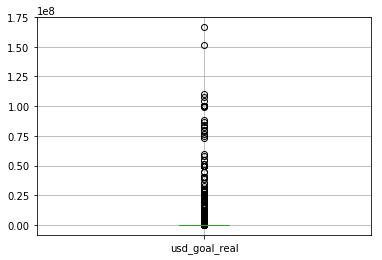

In [28]:
#Graficar los boxpltos

#sin dividir por categoria
kickstarter_2018.boxplot(column='usd_goal_real')

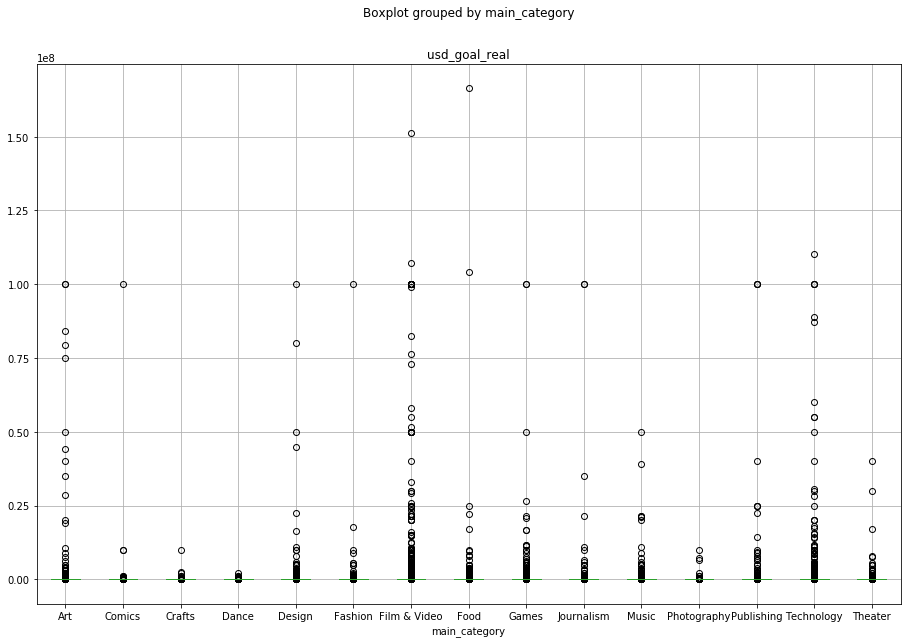

In [29]:
#Agrupando por categoria
kickstarter_2018.boxplot(column='usd_goal_real', by='main_category', figsize=[15, 10])